# Introduction

In [ ]:
## In this project, we want to train a model (using some features) that will predict if a loan applicant will be approve or not 

In [89]:
#Import neccessary libraries for this task

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white", context="talk")
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [15]:
loan = pd.read_csv('loan.csv')
loan.head(10)
#Our task here is to predict an applicant loan approval status using selected features of the loan applicant

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [16]:
#Check the number of roles and columns in the dataset
loan.shape

(614, 13)

In [17]:
#Verify if any null value exist in the dataset
#Some columns have noticeable numbers of NAs

loan.isna().sum()

#A number of columns have missing values.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Create Dictionary to Encode Some Columns

In [33]:
replace_dict = {
            "Married": {"Yes": 1, "No": 0},
            "Education": {"Graduate": 1, "Not Graduate": 0},
            "Gender": {"Male": 1, "Female": 0},
            "Property_Area": {"Urban": 2, "Semiurban": 1, "Rural": 0},
            "Self_Employed": {"Yes": 1, "No": 0},
            "Loan_Status": {"Y": 1, "N": 0},
            "Dependents": {"3+": 4}
}

loan = loan.replace(replace_dict)

# Dealing with the Missing Values

In [34]:
#### USING SIMPLE IMPUTER METHOD

#Here Strategy = 'most_frequent' which means it will replace missing using the most frequent value in the column

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(loan['Loan_Amount_Term'].values.reshape(-1, 1))

loan['Loan_Amount_Term'] = imp.transform(loan['Loan_Amount_Term'].values.reshape(-1, 1))

In [35]:
#### Here Strategy = 'mean' which means it will replace missing values using the mean in the column

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(loan['LoanAmount'].values.reshape(-1, 1))

loan['LoanAmount'] = imp.transform(loan['LoanAmount'].values.reshape(-1, 1))

In [36]:
##### Here Strategy = 'CONSTANT' which means it will replace missing values using number 1.0

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1.0)

imp.fit(loan['Credit_History'].values.reshape(-1, 1))

loan['Credit_History'] = imp.transform(loan['Credit_History'].values.reshape(-1, 1))

In [37]:
#### Replace missing values in the Gender column with the frequent occuring gender.

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(loan['Gender'].values.reshape(-1, 1))

loan['Gender'] = imp.transform(loan['Gender'].values.reshape(-1, 1))

# Here Strategy = 'median' it will replace missing values using the median in some columns

In [38]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(loan['Self_Employed'].values.reshape(-1, 1))

loan['Self_Employed'] = imp.transform(loan['Self_Employed'].values.reshape(-1, 1))

In [40]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(loan['Dependents'].values.reshape(-1, 1))

loan['Dependents '] = imp.transform(loan['Dependents'].values.reshape(-1, 1))

In [41]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(loan['Married'].values.reshape(-1, 1))

loan['Married'] = imp.transform(loan['Married'].values.reshape(-1, 1))

In [56]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(loan['Dependents'].values.reshape(-1, 1))

loan['Dependents'] = imp.transform(loan['Dependents'].values.reshape(-1, 1))

In [57]:
#Confirm the transformation
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Dependents           0
dtype: int64

In [58]:
#Get to know columns data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  Dependents         614 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory usage: 67.3+ KB


In [55]:
#View the cleaned dataset
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,LP001002,1,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,1,0.0
1,LP001003,1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1.0
2,LP001005,1,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1,0.0
3,LP001006,1,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1,0.0
4,LP001008,1,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1,0.0


In [64]:
#Scale some columns in our dataset, (do not scale the target column (Loan_status))
#Most machine learning classifiers prefer this.

from sklearn import preprocessing
from sklearn.preprocessing import normalize
min_max_scaler = preprocessing.MinMaxScaler()
cols_to_norm = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
loan[cols_to_norm] = min_max_scaler.fit_transform(loan[cols_to_norm])

In [65]:
#View the final scaled data
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,LP001002,1,0.0,0.0,1,0.0,0.070489,0.000000,0.172214,0.74359,1.0,2,1,0.0
1,LP001003,1,1.0,1.0,1,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0,0,1.0
2,LP001005,1,1.0,0.0,1,1.0,0.035250,0.000000,0.082489,0.74359,1.0,2,1,0.0
3,LP001006,1,1.0,0.0,0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,2,1,0.0
4,LP001008,1,0.0,0.0,1,0.0,0.072356,0.000000,0.191027,0.74359,1.0,2,1,0.0


Calculating Correlation Matrix

In [67]:
loan_corr = loan.corr()

loan_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000000,0.364569,0.165877,-0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987,0.165877
Married,0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478,0.308408
Dependents,0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170584,-0.104059,-0.047203,-0.012006,0.002474,1.000000
Education,-0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.065243,0.085884,-0.059001
Self_Employed,-0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700,0.048028
ApplicantIncome,0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710,0.134080
CoapplicantIncome,0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187,0.034780
LoanAmount,0.106904,0.146546,0.170584,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214,0.170584
Loan_Amount_Term,-0.074030,-0.100912,-0.104059,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549,-0.104059
Credit_History,0.009170,0.010938,-0.047203,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556,-0.047203


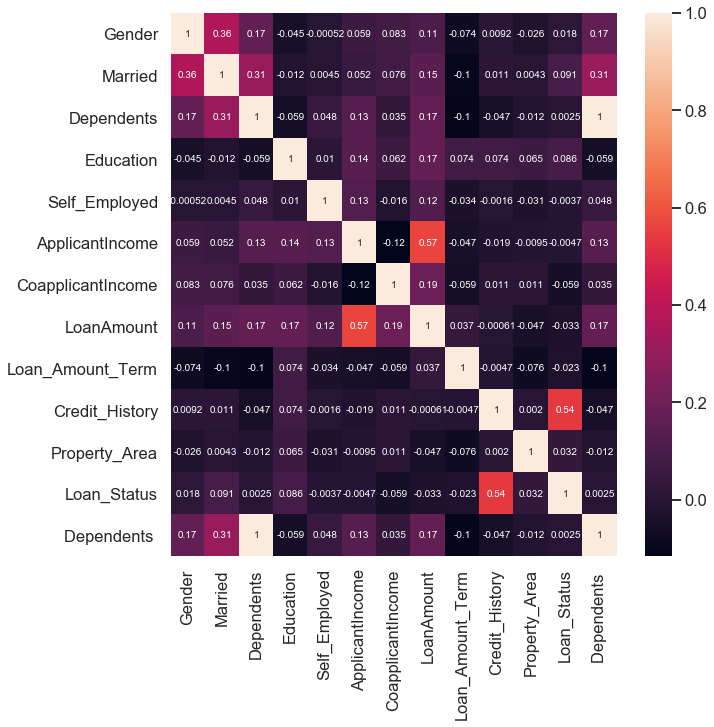

In [68]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_corr, annot=True)

The correlation analysis above shows that there are high correlations between:
    1. Applicant Income and Loan Amount
    2. Credit History and Loan Status

### Applying Feature Correlation to Detect Features with High Correlation with Our Target/Outcome (Loan Status)

In [100]:
# X are all our features (after droping our target 'Loan_Status' and 'Loan_ID')
# Y is the target we are trying to predict (that is Loan_Status)

X = loan.drop(['Loan_ID', 'Loan_Status'], axis=1)
Y = loan['Loan_Status']

In [101]:
feature_names=X.columns
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Dependents '],
      dtype='object')

In [ ]:
### Visualizing Feature Correlations

This visualizer calculates Pearson correlation coefficients and mutual information between features and 
the dependent variable. This visualization can be used in feature selection to identify features 
with high correlation or large mutual information with the dependent variable.

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


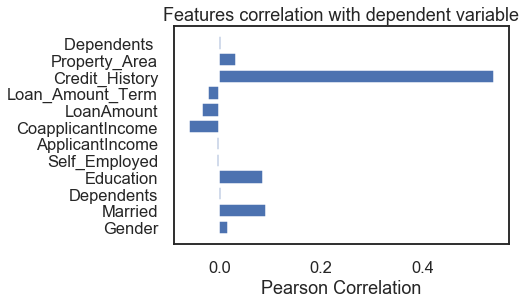

In [102]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [103]:
visualizer.scores_

array([ 0.01798668,  0.09147782,  0.00247405,  0.08588391, -0.00370044,
       -0.00470952, -0.05918731, -0.03321426, -0.02254899,  0.54055607,
        0.03211198,  0.00247405])

In [104]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Gender,0.017987
1,Married,0.091478
2,Dependents,0.002474
3,Education,0.085884
4,Self_Employed,-0.003700
5,ApplicantIncome,-0.004710
6,CoapplicantIncome,-0.059187
7,LoanAmount,-0.033214
8,Loan_Amount_Term,-0.022549
9,Credit_History,0.540556


Only Credit_History have a fair correlation with our target column (Loan_Status)

# Implementing Multiple Machine Learning Algorithms on the Dataset 

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [106]:
X_train.shape, X_test.shape 

((491, 12), (123, 12))

In [107]:
Y_train.shape, Y_test.shape

((491,), (123,))

Train the model with X_train to give the corresponding Y_train labels
Evaluate the trained model by prediction on the X_test to give the corresponding labels (Y_pred) which will be compared with
the actual lables (Y_test).

# Training Various Models for Loan Status Classification

In [114]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_linreg= round(linreg.score(X_train, Y_train) * 100, 2)
acc_linreg

31.28

Performs poorly because, Linear regression is not suitable for predicting output that has categorical values.

In [136]:
#### Linear SVC
#Works quite similar to the SVM. The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, 
#returning a "best fit" hyperplane that divides or categorizes your data into classes.

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100,2)
print("Training_Score:",acc_linear_svc)

Training_Score: 80.65


In [140]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)* 100)

Testing_score :  83.73983739837398


In [141]:
### Support Vector Machines (SVM)
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("Training_Score:",acc_svc)

Training_Score: 80.65


In [142]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

Testing_score :  82.92682926829268


In [154]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print("Training_Score:",acc_sgd)

Training_Score: 80.24


In [155]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

Testing_score :  84.5528455284553


In [158]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Training_Score:",acc_random_forest)

#Seems to be overfitting

Training_Score: 100.0


In [157]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

#Prediction accuracy is low due to overfitting 

Testing_score :  78.04878048780488


In [160]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Training_Score:",acc_decision_tree)

Training_Score: 100.0


In [161]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

#Prediction accuracy is low due to overfitting 

Testing_score :  70.73170731707317


In [166]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("Training_Score:",acc_knn)

Training_Score: 82.89


In [163]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

Testing_score :  70.73170731707317


In [167]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("Training_score:",acc_gaussian)

Training_score: 79.23


In [171]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

Testing_score :  82.92682926829268


In [195]:
#AdaBoost Classifier
ad = AdaBoostClassifier(n_estimators=100, random_state=0)
ad.fit(X_train, Y_train)
Y_pred = ad.predict(X_test)
acc_ad_boost = round(ad.score(X_train, Y_train) * 100, 2)
print("Training_Score:",acc_ad_boost)

Training_Score: 84.93


In [196]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

Testing_score :  82.92682926829268


In [183]:
#Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)
acc_log_model = round(logistic_model.score(X_train, Y_train) * 100, 2)
print("Training_Score:",acc_log_model)

Training_Score: 80.45


In [184]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(Y_test, Y_pred)*100)

Testing_score :  82.92682926829268


In [197]:
models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Linear Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression',
                  'Stochastic Gradient Descent', 'Linear SVC', 'Decision Tree','AdaBoost'],
        'Score': [acc_svc, acc_knn, acc_linreg, 
              acc_random_forest, acc_gaussian, acc_log_model, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_ad_boost]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
9,AdaBoost,84.93
1,KNN,82.89
0,Support Vector Machines,80.65
7,Linear SVC,80.65
5,Logistic Regression,80.45
6,Stochastic Gradient Descent,80.24
4,Naive Bayes,79.23
2,Linear Regression,31.28


The best model here is Adaptive Boosting (AdaBoost)
AdaBoost is a popular boosting technique which helps combine multiple “weak classifiers” into a single “strong classifier”.

In [198]:
acc_ad_boost = pd.DataFrame({'predicted': Y_pred, 'actual': Y_test})

acc_ad_boost.head(10)

,predicted,actual
454,1,1
52,1,0
536,1,1
469,1,0
55,1,1
62,0,0
539,1,1
432,1,1
367,0,0
482,1,1


# Save Model Parameterization

We can now export our best performing model to a place where it can be deployed in the real world.

In [200]:
from sklearn.externals import joblib
joblib.dump(ad, 'filename.pkl')
model = joblib.load('filename.pkl')